# Exploratory Data Analysis Project  
Author: Terry Konkin  
Purpose: Exploratory Data Analysis  
Date: February 21, 2025

# 1. Imports  
matplotlib  
pandas  
seaborn

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 2. Load Data

In [10]:
# Load the dataset into a pandas DataFrame - adjust this process for your custom data
taxis_df: pd.DataFrame = sns.load_dataset('taxis')

# Inspect first rows of the DataFrame
taxis_df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


# 3. Initial Data Inspection

In [11]:
# Specify the number of rows to display
print(taxis_df.head(10))

# Inspect the data types of the columns with dtypes attribute
# The data types are returned as a pandas Series
print(taxis_df.dtypes)


# Inspect the shape of the DataFrame with shape attribute
# The shape is a tuple with count of rows and columns in the DataFrame
taxis_df.shape


               pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   
5 2019-03-11 10:37:23 2019-03-11 10:47:31           1      0.49   7.5  2.16   
6 2019-03-26 21:07:31 2019-03-26 21:17:29           1      3.65  13.0  2.00   
7 2019-03-22 12:47:13 2019-03-22 12:58:17           0      1.40   8.5  0.00   
8 2019-03-23 11:48:50 2019-03-23 12:06:14           1      3.63  15.0  1.00   
9 2019-03-08 16:18:37 2019-03-08 16:26:57           1      1.52   8.0  1.00   

   tolls  total   color      payment                pickup_zone  \
0    0.0  12.95  yellow  credit card            Lenox Hill West

(6433, 14)

# 4. Initial Descriptive Statistics

In [12]:
# Inspect summary statistics for numerical columns
taxis_df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


# 5A. Initial Data Distribution for Numerical Columns

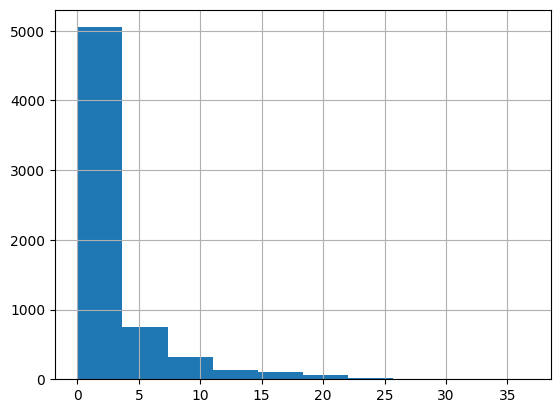

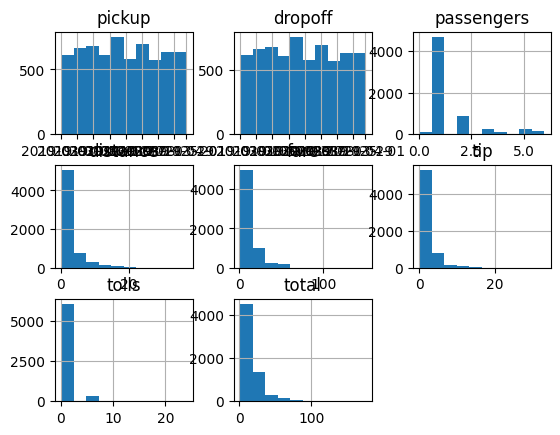

In [13]:
# Inspect histogram by one numerical column
taxis_df['distance'].hist()

# Inspect histograms for ALL numerical columns
taxis_df.hist()

# Show all plots
matplotlib.pyplot.show()

Observations:  
The distance histogram shows that the vast majority of trips are less than 5 miles.  
The passengers histogram shows that almost all trips have only 1 passenger.

# 5B. Initial Data Distribution for Categorical Columns

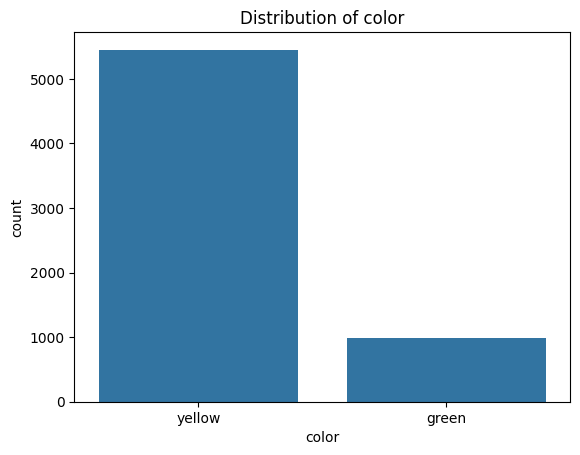

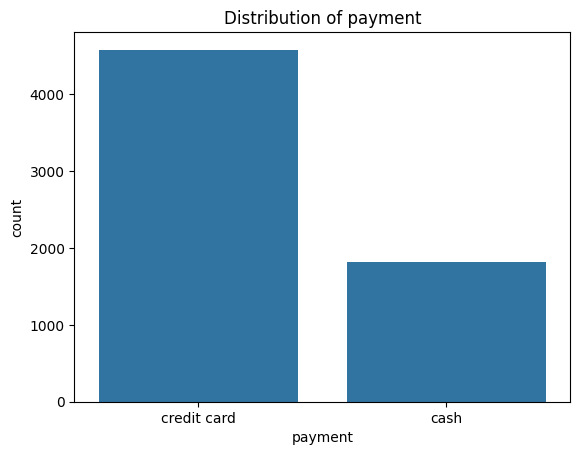

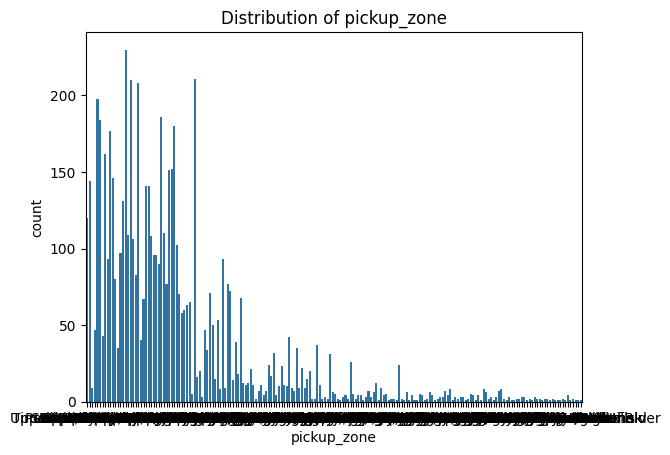

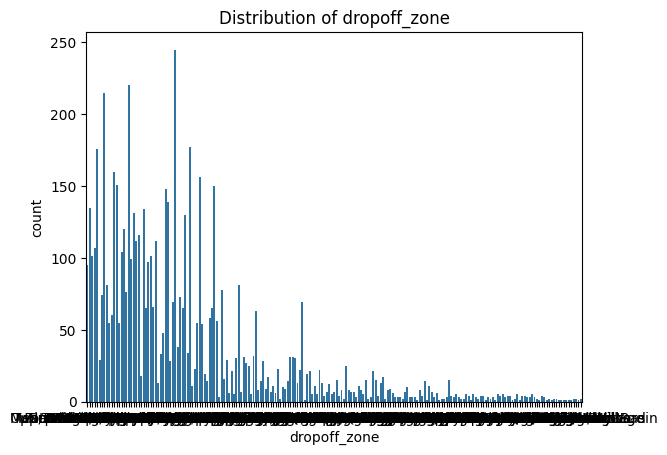

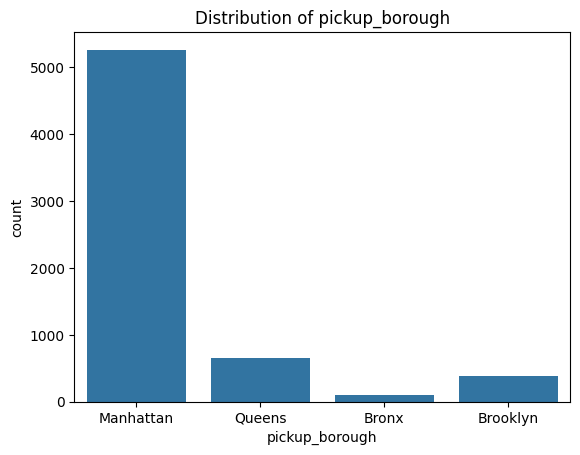

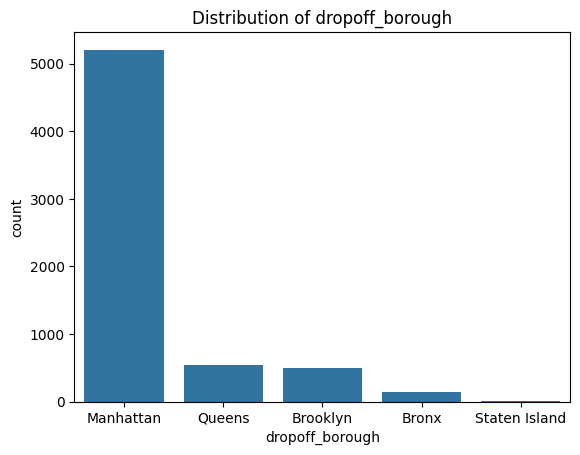

In [14]:
# Inspect value counts by categorical column
taxis_df['payment'].value_counts()

# Inspect value counts for all categorical columns
for col in taxis_df.select_dtypes(include=['object']).columns:
    # Display count plot
    sns.countplot(x=col, data=taxis_df)
    matplotlib.pyplot.title(f'Distribution of {col}')
    matplotlib.pyplot.show()

# Show all plots
matplotlib.pyplot.show()

Observations:  
Payments by credit card are significantly greater (x2) than cash.  
Pickups & dropoffs in manhattan far exceed the other boroughs.

# 6. Feature Engineering

In [15]:
# Feature Engineering
# Renaming a column
taxis_df.rename(columns={'color': 'Taxi Type'}, inplace=True)

# Adding a new column
taxis_df['Tip Percentage'] = taxis_df['tip'] / taxis_df['fare']


# 7A. Visualization  
Goal: determine if tip amount closely correlates with fare amount.  
Chart Type: Scatterplot


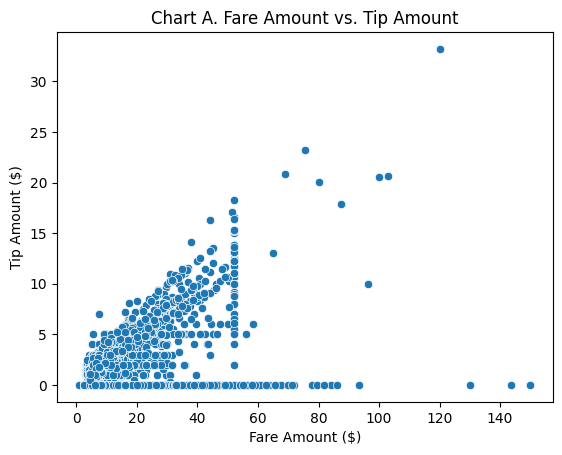

In [17]:
# A scatter plot is a plot of two numerical variables.
scatter_plt: plt.Axes = sns.scatterplot(
    data=taxis_df, x="fare", y="tip"
)

# Set axis labels using the Matplotlib Axes methods set_xlabel() and set_ylabel()
scatter_plt.set_xlabel("Fare Amount ($)")
scatter_plt.set_ylabel("Tip Amount ($)")   

# Set the title using the Matplotlib Axes set_title() method
scatter_plt.set_title("Chart A. Fare Amount vs. Tip Amount")

matplotlib.pyplot.show()

Observations:  
Tip amount has a general positive correlation with fare amount.  
Ther are outliers oberved; i.e., zero tip regardless of fare amount.  
